In [40]:
# import libeary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
#read clean data set 
df = pd.read_csv ('Social Media Users.csv')

In [42]:
# read first 5 rows
df.head()

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13
3,Instagram,Meta,Photo and video sharing,Timor-Leste,295.43,Yes,2019-04-21
4,Threads,Meta,Text-based social networking,Bermuda,71.78,No,2015-07-14


# Outliear Remove

In [43]:
# define numerical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_columns

['Daily Time Spent (min)']

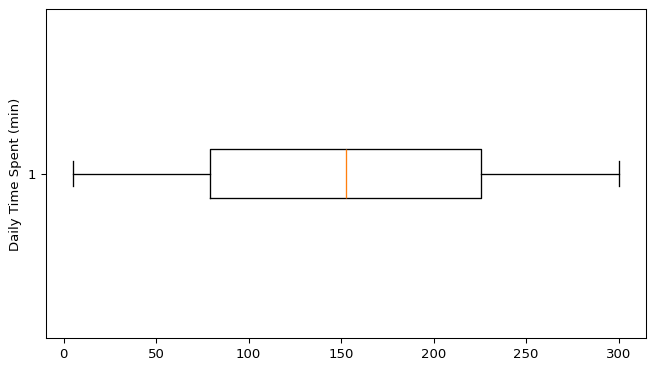

In [44]:
# Identify outliers using box plots
fig, axs = plt.subplots(len(numerical_columns), 1, dpi=95, figsize=(7, 4))
if len(numerical_columns) == 1:
    axs = [axs]
for i, col in enumerate(numerical_columns):
    axs[i].boxplot(df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()

In [45]:
non_normal = df['Daily Time Spent (min)']

In [46]:
col = 'Daily Time Spent (min)'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
outliers = df[(df[col] < lower) | (df[col] > upper)]

In [47]:
outliers

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined


# Insight and Ovservation

- Dataset haven't any outliers

# Convert Date Joined to pandas datetime columns


In [48]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'] , format = "%Y-%m-%d")

In [49]:
# save preprocessing dataset
df.to_csv("preprocessing_data.csv",index=False)

__________________________